# **Introduction**

 It is essential to comprehend the connections between economic indicators and environmental repercussions in the connected world of today. In addition to tackling climate change and lowering their carbon footprint, nations aim to expand their economy. This analysis attempts to illustrate the relationship between economic output and environmental burdens on a per-capita basis by looking at data on GDP, CO2 emissions, and population across a number of European countries (France, Germany, Italy, and Spain) for a particular year. A consistent financial benchmark is also provided by including currency exchange rates, enabling more precise comparisons.

A complete approach was laid out by the procedures that were followed: data ingestion from various sources (CSV, Excel, API), integration through merging, data transformations, aggregations, and visualizations. These processes ensure that the final dataset is both insightful and ready for interpretation, enabling users to move beyond raw figures and toward meaningful conclusions.

Informed Policy-Making: Assists decision-makers in evaluating their nation's economic performance and CO2 intensity in relation to peers, thereby directing policies for sustainable growth.
International benchmarking helps businesses monitor their progress in reducing emissions and find best practices around the world.



Resource Allocation: Helps governments and investors choose nations with robust economies and low emissions so they may make focused investments in green technologies.


Public Engagement: Promotes comprehension and support for environmental policy by distilling complex data into understandable graphics.

In [224]:
import pandas as pd
import numpy as np
import requests
import matplotlib.pyplot as plt


target_countries = ["France", "Germany", "Italy", "Spain"]
target_year = 2019
# Data Loading
def load_csv(url: str) -> pd.DataFrame:
    """
    Load data from a CSV URL into a Pandas DataFrame

    Args:
      url (str): The URL pointing to the CSV file


    Returns:
      pd.DataFrame: DataFrame containing the loaded CSV data.
    """
    return pd.read_csv(url)

def get_exchange_rate(url: str) -> pd.DataFrame:
    """
    Fetch exchange rates from an API and return the USD to EUR rate.

    Args:
        url (str): The URL for the exchange rate API.

    Returns:
        pd.DataFrame: DataFrame containing the currency ('EUR') and the exchange rate.
    """
    response = requests.get(url)
    rates = response.json().get("conversion_rates", {})
    return pd.DataFrame({"currency": ["EUR"], "rate": [rates.get("EUR", np.nan)]})


# Data URLs
gdp_url = "https://raw.githubusercontent.com/datasets/gdp/master/data/gdp.csv"
exchange_api_url = "https://v6.exchangerate-api.com/v6/b060ebe8a26da2b024b95726/latest/USD"

# Loading datasets
gdp_df = load_csv(gdp_url)
co2_df = pd.read_excel("/content/co2_data.xlsx")
exchange_df = get_exchange_rate(exchange_api_url)

# Displaying sample data
print(gdp_df.head())
print(co2_df.head())
print(exchange_df)


  Country Name Country Code  Year         Value
0  Afghanistan          AFG  2000  3.521418e+09
1  Afghanistan          AFG  2001  2.813572e+09
2  Afghanistan          AFG  2002  3.825701e+09
3  Afghanistan          AFG  2003  4.520947e+09
4  Afghanistan          AFG  2004  5.224897e+09
       country  year iso_code  population  gdp  cement_co2  \
0  Afghanistan  1750      AFG   2802560.0  NaN         0.0   
1  Afghanistan  1751      AFG         NaN  NaN         0.0   
2  Afghanistan  1752      AFG         NaN  NaN         0.0   
3  Afghanistan  1753      AFG         NaN  NaN         0.0   
4  Afghanistan  1754      AFG         NaN  NaN         0.0   

   cement_co2_per_capita  co2  co2_growth_abs  co2_growth_prct  ...  \
0                    0.0  NaN             NaN              NaN  ...   
1                    NaN  NaN             NaN              NaN  ...   
2                    NaN  NaN             NaN              NaN  ...   
3                    NaN  NaN             NaN          

The worldwide GDP dataset is being loaded from an internet repository. We would have to download and load the CSV by if this didn't exist. By automating this stage, the analysis becomes easy to maintain and reproducible.

The API provides a current USD-to-EUR rate, enabling us to contextualize or convert economic values into a consistent currency. This helps in comparing values that might originally be expressed in USD across countries using EUR.




In [225]:
gdp_df.head()

,Country Name,Country Code,Year,Value
0,Afghanistan,AFG,2000,3.521418e+09
1,Afghanistan,AFG,2001,2.813572e+09
2,Afghanistan,AFG,2002,3.825701e+09
3,Afghanistan,AFG,2003,4.520947e+09
4,Afghanistan,AFG,2004,5.224897e+09


In [226]:
co2_df.head()

,country,year,iso_code,population,gdp,cement_co2,cement_co2_per_capita,co2,co2_growth_abs,co2_growth_prct,...,share_global_other_co2,share_of_temperature_change_from_ghg,temperature_change_from_ch4,temperature_change_from_co2,temperature_change_from_ghg,temperature_change_from_n2o,total_ghg,total_ghg_excluding_lucf,trade_co2,trade_co2_share
0,Afghanistan,1750,AFG,2802560.0,NaN,0.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,1751,AFG,NaN,NaN,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Afghanistan,1752,AFG,NaN,NaN,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,1753,AFG,NaN,NaN,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,1754,AFG,NaN,NaN,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [227]:
exchange_df.head()

,currency,rate
0,EUR,0.9497


In [228]:
# Data Selection and Preparation
# Filtering for target columns which are ["France", "Germany", "Italy", "Spain"] and target year 2019
gdp_filtered = gdp_df[(gdp_df["Country Name"].isin(target_countries)) & (gdp_df["Year"] == target_year)]
gdp_filtered = gdp_filtered[["Country Name", "Year", "Value"]]
gdp_filtered.rename(columns={"Country Name": "country", "Value": "gdp_value"}, inplace=True)

# filtering co2 data using similar target countries and year

co2_filtered = co2_df[(co2_df["country"].isin(target_countries)) & (co2_df["year"] == target_year)]
co2_filtered = co2_filtered[["country", "year", "co2", "population"]]

# For the currency part, I am assuming that all the countires use Euros
country_currency = pd.DataFrame({
    "country": target_countries,
    "currency": ["EUR", "EUR", "EUR", "EUR"]
})
gdp_filtered.rename(columns={"Country Name": "country", "Value": "gdp_value", "Year": "year"}, inplace=True)

In [229]:
def merge(df1: pd.DataFrame, df2: pd.DataFrame, key: str, join_type: str = "inner") -> pd.DataFrame:
    """
    Merge two DataFrames on a given key
    Args:
        df1 (pd.DataFrame): First DataFrame
        df2 (pd.DataFrame): Second DataFrame
        key (str or list): Column names to merge on
        join_type (str): THE Type of join operation the default is inner

    Returns:
        pd.DataFrame: Resulting merged DataFrame
    """
    return pd.merge(df1, df2, on=key, how=join_type)

# Merging GDP with CO2 data on country and year
merged_data = merge(gdp_filtered, co2_filtered, key=["country", "year"])

# Merging with currency info on country
merged_data = merge(merged_data, country_currency, key="country")

# Merging with exchange rates on 'currency'
final_data = merge(merged_data, exchange_df, key="currency")


# Merging

Merge GDP and CO2 Data:
By merging the filtered GDP data with CO2 emissions data on both 'country' and 'year', we integrate economic and environmental indicators into a single dataset.


Merge with Currency Information:
Adding a DataFrame that maps each country to a currency (EUR in this case) allows us to link the combined dataset to the appropriate currency.


Merge with Exchange Rates:
Finally, by merging the combined dataset with the exchange rate DataFrame, we associate an exchange rate value with each record. This allows for currency conversions and more meaningful economic comparisons.

In [230]:
final_data.head()

,country,year,gdp_value,co2,population,currency,rate
0,France,2019,2.728870e+12,315.015,65729460.0,EUR,0.9497
1,Germany,2019,3.889178e+12,709.827,83559185.0,EUR,0.9497
2,Italy,2019,2.011302e+12,339.634,60130136.0,EUR,0.9497
3,Spain,2019,1.394320e+12,250.596,47435120.0,EUR,0.9497


In [231]:
def transform_data(df: pd.DataFrame) -> pd.DataFrame:
    """
    Apply field-level transformations:
    1. Convert country names to uppercase
    2. GDP per capita = gdp_value / population
    3. CO2 per capita = co2 / population
    4. Log transform GDP (log_gdp)
    5. high_co2_flag if co2_per_capita > 5
    6. co2_category: categorize co2_per_capita as 'Low', 'Medium', or 'High'
    7. Round gdp_per_capita to two decimal places

    Args:
        df (pd.DataFrame): Input DataFrame
    Returns:
        pd.DataFrame: Transformed DataFrame
    """
    # 1. Converting country to uppercase
    df["country"] = df["country"].str.upper()

    # Replacing 0 population to avoid division by zero
    df["population"] = df["population"].replace(0, np.nan)

    # 2. GDP per capita
    df["gdp_per_capita"] = df["gdp_value"] / df["population"]

    # 3. CO2 per capita
    df["co2_per_capita"] = df["co2"] / df["population"]

    # 4. Log transforming GDP
    df["log_gdp"] = np.log1p(df["gdp_value"])

    # 5. High CO2 flag
    df["high_co2_flag"] = df["co2_per_capita"] > 5.0

    # 6. Categorize CO2 levels
    # Thresholds I chose are: <2 = Low, 2-5 = Medium, >5 = High
    conditions = [
        (df["co2_per_capita"] < 2),(df["co2_per_capita"] >= 2) & (df["co2_per_capita"] <= 5),(df["co2_per_capita"] > 5)]
    categories = ["Low", "Medium", "High"]
    df["co2_category"] = np.select(conditions, categories, default="Unknown")

    # 7. Round gdp_per_capita to two decimals
    df["gdp_per_capita"] = df["gdp_per_capita"].round(2)

    return df

final_df = transform_data(final_data)


### Transformation

This step prepares the data for meaningful comparisons, visualizations, and further statistical analysis. By working with per capita and log-transformed values, and by adding categorical indicators, the dataset becomes more insightful and user-friendly.


In [232]:
final_df.head()

,country,year,gdp_value,co2,population,currency,rate,gdp_per_capita,co2_per_capita,log_gdp,high_co2_flag,co2_category
0,FRANCE,2019,2.728870e+12,315.015,65729460.0,EUR,0.9497,41516.70,0.000005,28.634909,False,Low
1,GERMANY,2019,3.889178e+12,709.827,83559185.0,EUR,0.9497,46543.99,0.000008,28.989219,False,Low
2,ITALY,2019,2.011302e+12,339.634,60130136.0,EUR,0.9497,33449.15,0.000006,28.329803,False,Low
3,SPAIN,2019,1.394320e+12,250.596,47435120.0,EUR,0.9497,29394.26,0.000005,27.963428,False,Low


In [233]:
# Aggregation and Pivoting
def aggregate_data(df: pd.DataFrame) -> pd.DataFrame:
    """
    Even though we only have a few European countries here I am Aggregating data
    I am aggregating to get mean gdp_per_capita and co2_per_capita

    Args:
        df (pd.DataFrame): Input DataFrame
    Returns:
        pd.DataFrame: Aggregated results
    """
    # assigning a continent column
    df["continent"] = "Europe"
    agg_df = df.groupby("continent").agg(
        mean_gdp_per_capita=("gdp_per_capita", "mean"),
        mean_co2_per_capita=("co2_per_capita", "mean")
    ).reset_index()
    return agg_df


def pivot_data(df: pd.DataFrame) -> pd.DataFrame:
    """
    Pivoting data to compare GDP per capita and CO2 per capita by country

    Args:
        df (pd.DataFrame): Input DataFrame
    Returns:
        pd.DataFrame: Pivoted DataFrame with metrics as columns and countries as rows
    """
    # pivoting on country, with rows as country and columns as metrics
    pivot_df = df.pivot_table(
        index="country",
        values=["gdp_per_capita", "co2_per_capita"],
        aggfunc="mean"
    )
    return pivot_df

#Display aggregated results and pivoted results
aggregated_results = aggregate_data(final_df)
pivoted_results = pivot_data(final_df)

# pivoting

Pivoting the data makes it easier to compare countries side-by-side. After pivoting, we can more intuitively inspect differences in GDP and CO2 per capita without sifting through multiple rows or complex groupings. This is particularly helpful for reporting, visualization, or additional statistical operations that expect a "wide" format dataset (one row per country and one column per metric).

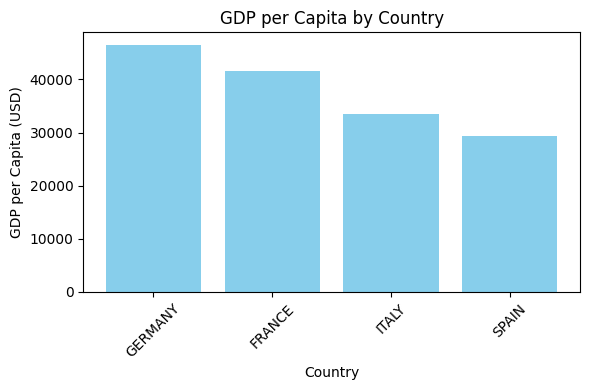

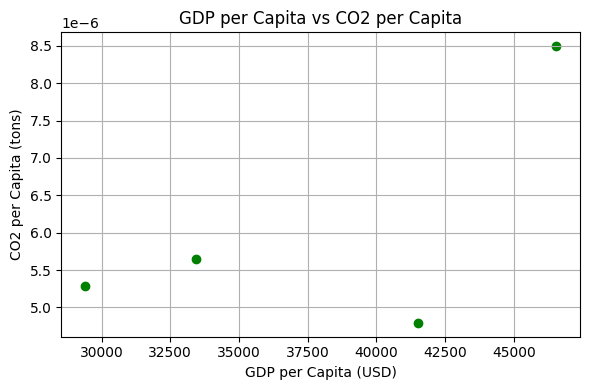

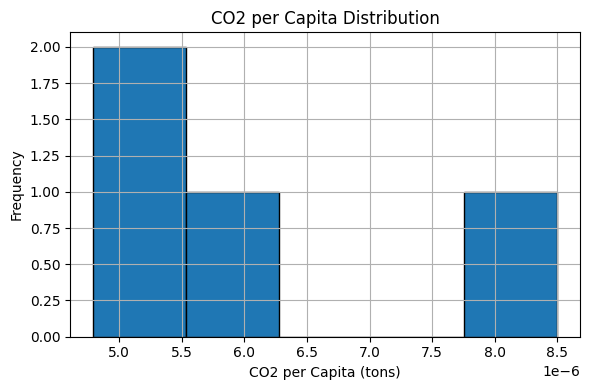

In [234]:
def visualize(df: pd.DataFrame):
    """
    Generate visualizations:
    - Bar chart: GDP per capita by country.
    - Scatter plot: GDP per capita vs CO2 per capita.
    - Histogram: Distribution of CO2 per capita.

    Args:
        df (pd.DataFrame): Input data.
    """
    # Sorting data for bar chart
    sorted_df = df.sort_values("gdp_per_capita", ascending=False)

    # 1. Bar chart
    plt.figure(figsize=(6, 4))
    plt.bar(sorted_df["country"], sorted_df["gdp_per_capita"], color="skyblue")
    plt.title("GDP per Capita by Country")
    plt.xlabel("Country")
    plt.ylabel("GDP per Capita (USD)")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

    # 2. Scatter plot
    plt.figure(figsize=(6, 4))
    plt.scatter(df["gdp_per_capita"], df["co2_per_capita"], color="green")
    plt.title("GDP per Capita vs CO2 per Capita")
    plt.xlabel("GDP per Capita (USD)")
    plt.ylabel("CO2 per Capita (tons)")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    # 3. Histogram
    plt.figure(figsize=(6, 4))
    df["co2_per_capita"].hist(bins=5, edgecolor="black")
    plt.title("CO2 per Capita Distribution")
    plt.xlabel("CO2 per Capita (tons)")
    plt.ylabel("Frequency")
    plt.tight_layout()
    plt.show()

visualize(final_df)


## Visualization

Due to its status as the largest economy in Europe and its high level of industrialization, Germany has the most robust economic production per person.
France comes in second, which is consistent with its robust economy that is fueled by a combination of the industrial, agricultural, and service sectors.
Compared to Germany and France, Italy and Spain have lower GDPs per capita, which suggests that their economies produce comparatively less per person.


According to the points, nations with somewhat higher GDPs per capita also often have slightly greater CO2 emissions per capita. This supports the hypothesis that higher levels of industrial activity, energy use, and consumption in wealthier economies may result in higher emissions.
Outliers: The nation with the highest per capita GDP also has the highest per capita CO2 emissions. Considering that Germany is a major industrial power and the continent's economic powerhouse, this is probably Germany.
In terms of GDP and CO2 per capita, other nations likely Spain and Italy appear at the bottom, indicating comparatively lower levels of economic output and emissions.


Cluster at Low CO2 Levels: A sizable percentage of the examined countries have comparatively low CO2 emissions per capita, as seen by the fact that the greatest number of countries fall into the 5.0–5.5 tons per capita range.
Gap in the Middle Range: The middle range, which includes no countries, has a noticeable gap of 6.0 to 7.5 tons per capita. This suggests a bimodal distribution, with the countries under analysis having either low emissions per capita (about 5.0) or greater emissions (around 8.0).
Outliers with High Emissions: One or two nations have emissions per capita that are greater than average, falling between 8.0 and 8.5 tons. These nations may be more dependent on energy-intensive sectors or fossil fuels.

## Datasets links

gdp Dataset: https://raw.githubusercontent.com/datasets/gdp/master/data/gdp.csv

co2_data: https://raw.githubusercontent.com/owid/co2-data/refs/heads/master/owid-co2-data.csv